<a href="https://colab.research.google.com/github/8ctal/IA_Course_Talento_Tech/blob/main/MISION3G61.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#EJERCICIO DEL TITANIC

#Libreria para capturar y transformar a matriz o cuadro
import pandas as pd

#PASO 1: CREAR EL DATA FRAME
df = pd.read_csv('train.csv')
df_y = pd.read_csv('test.csv')
df.head() #Encabezado la primera parte de los archivos...

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#PASO 2: ANALIZAR LAS COLUMNAS Y TIPOS DE DATOS DE DF
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Existen dos columnas con datos nulos: Age- 177 registros, Cabin- 687 registros.

In [ ]:
#PASO 3: REVISAR CUANTOS NULOS HAY EN CADA COLUMNA
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
#PASO 4: ANALIZAR DE FORMA ESTADISTICA LOS DATOS
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


La clase promedio es 2, la edad promedio es 29, minimo de edad 0 y maximo 80, hermanos 0 -8, Padres 0 - 6 prom=0

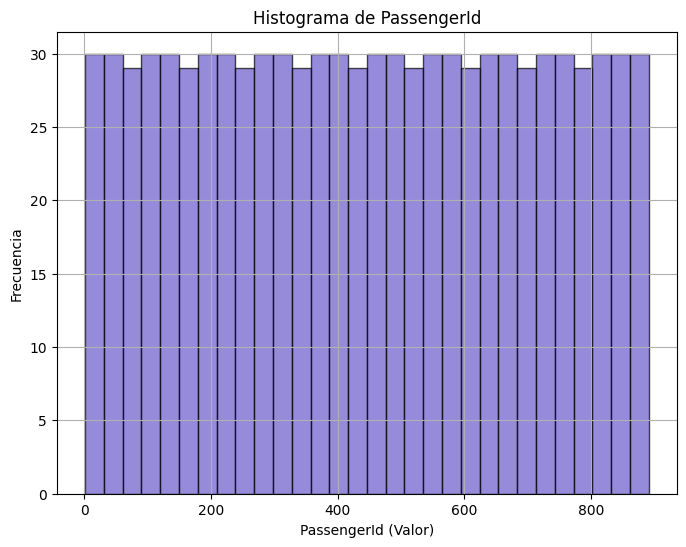

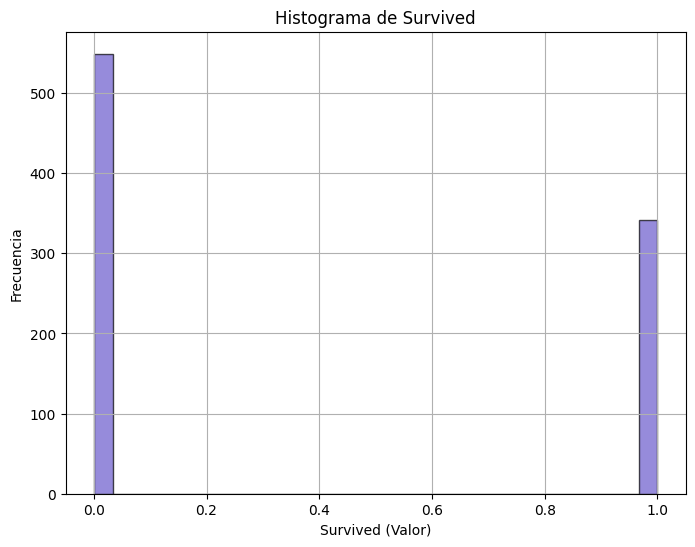

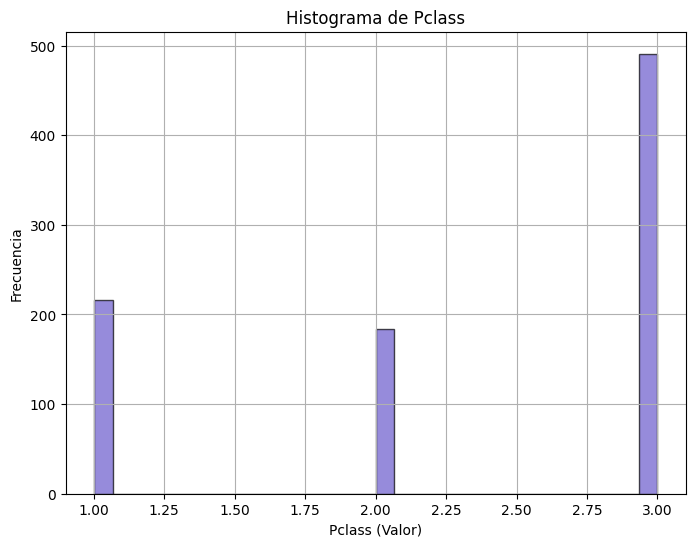

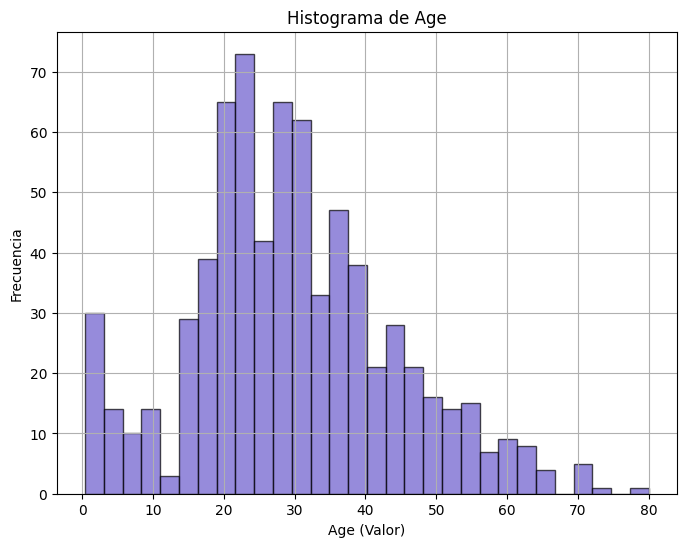

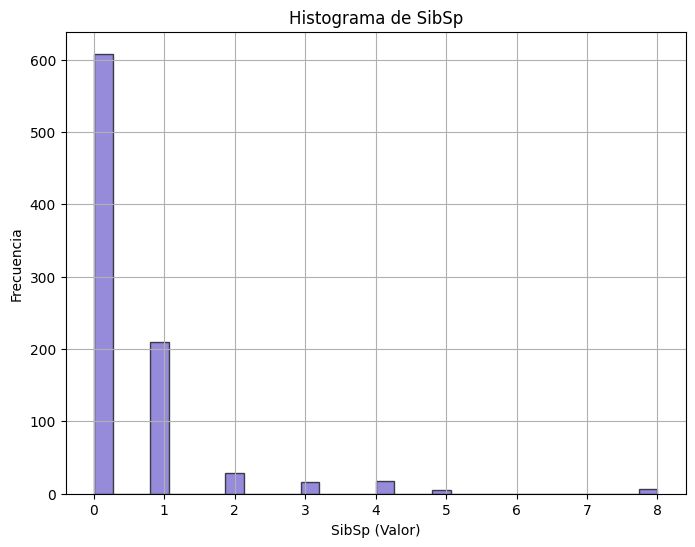

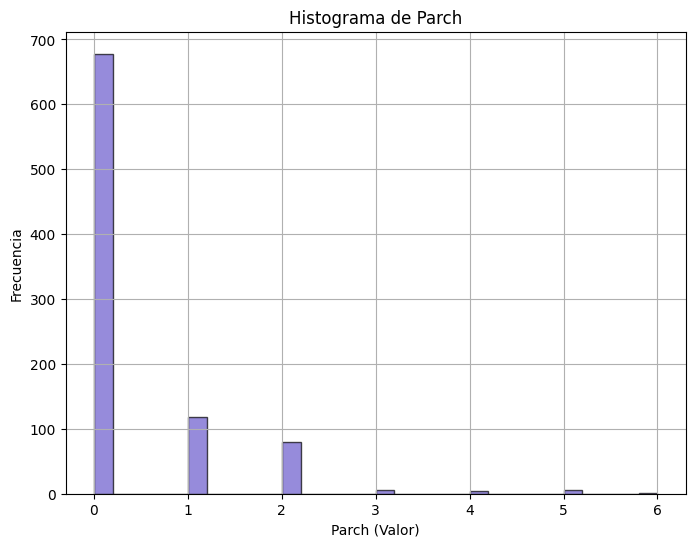

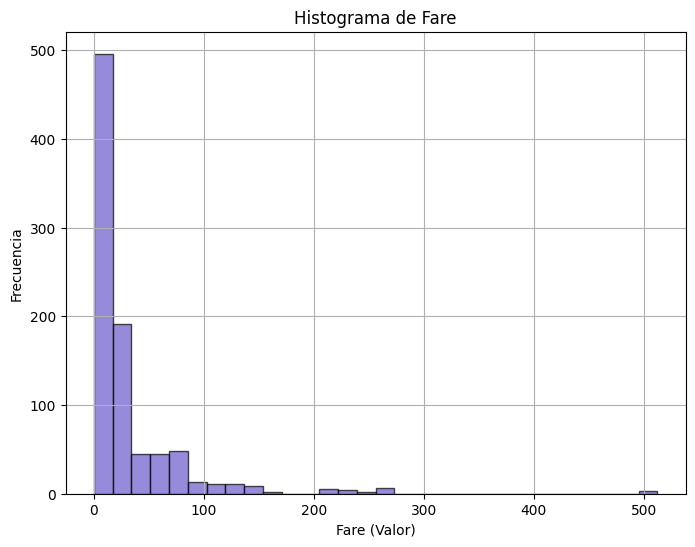

In [ ]:
#PASO 5: MOSTRAR LOS HISTOGRAMAS DE TODAS LAS COLUMNAS
import matplotlib.pyplot as plt #Libreria para graficas

# Graficar histogramas para cada columna numérica
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 6))
    df[column].hist(bins=30, color='slateblue', edgecolor='black', alpha=0.7)
    plt.title(f'Histograma de {column}')  # Título para cada gráfico
    plt.xlabel(f'{column} (Valor)')  # Etiqueta del eje X
    plt.ylabel('Frecuencia')  # Etiqueta del eje Y
    plt.show()

-Hay más muertes que sobrevivientes
-Sobrevivieron aprox 350 personas
-Murieron aproximadamente 550 personas
-Hay mayor población de clase 3, le sigue población clase 1, por ultimo tenemos población clase 2.
-Mayor parte de la población eran jovenes entre 14 años y 50 años.
-La mayoría de la población no tiene acompañante, van solos.
-Mayoria de la población eran solteros sin hijos.
-Mayoria de la población pago menos de 100 libras

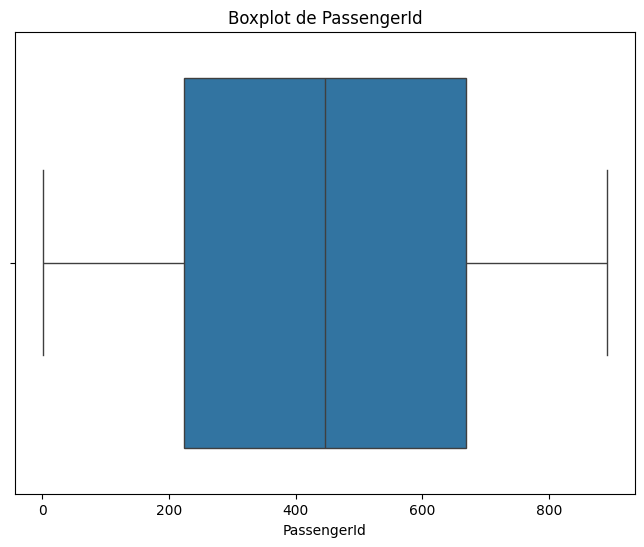

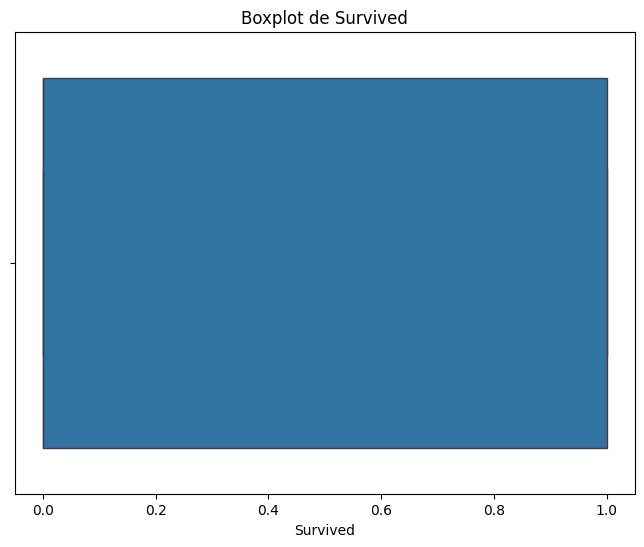

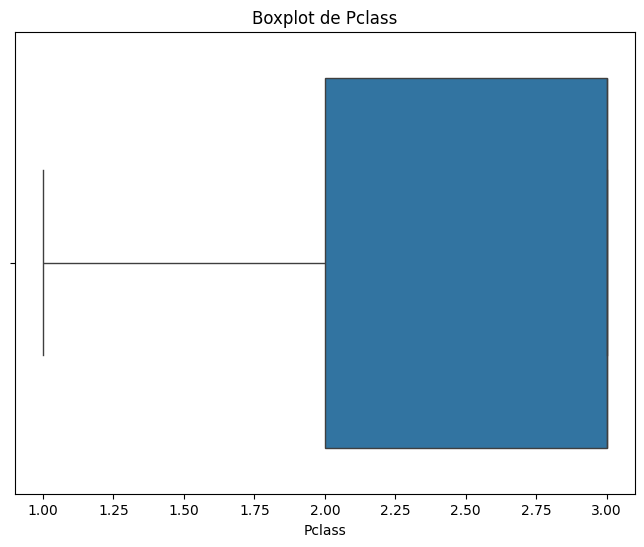

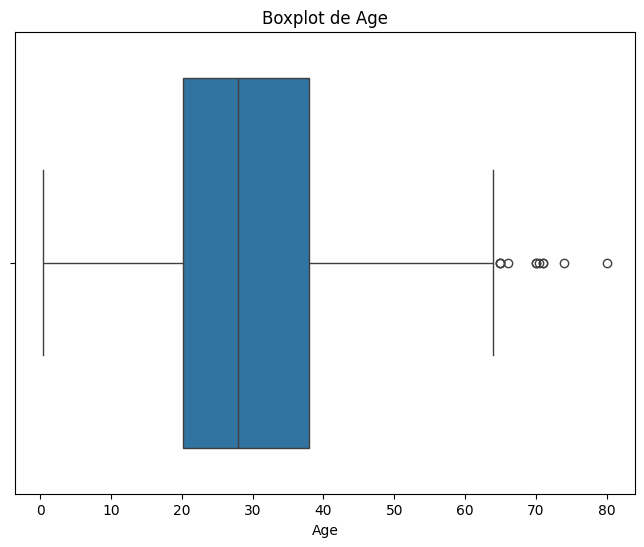

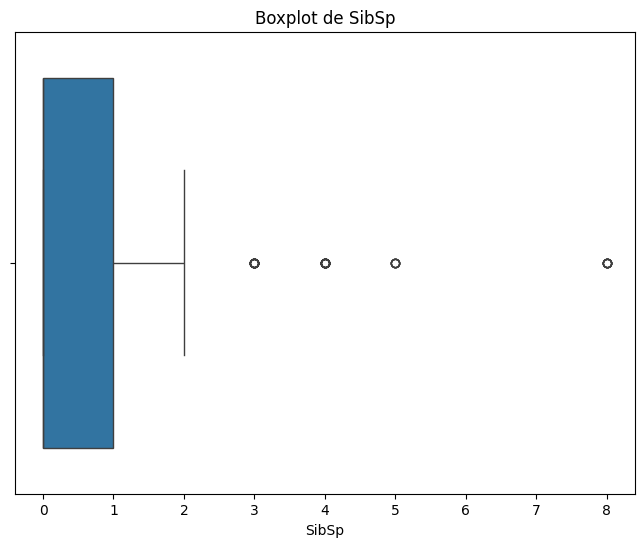

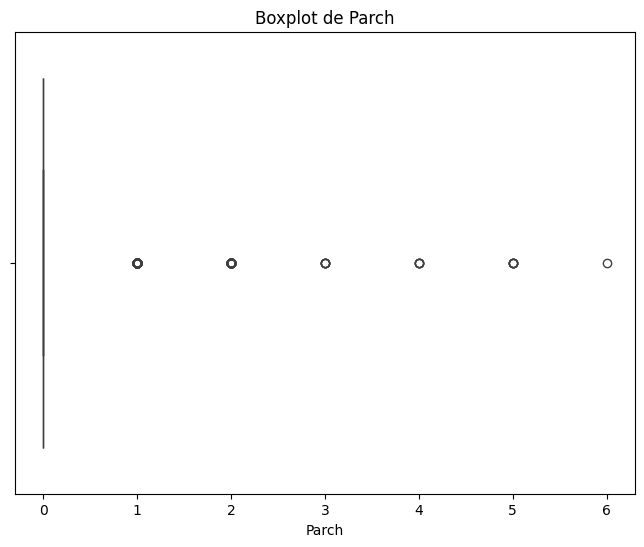

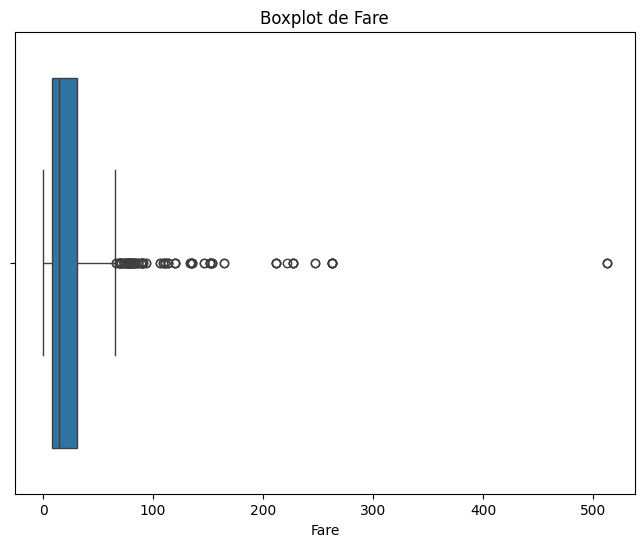

In [ ]:
#PASO 6: CAJA DE PUNTOS DE TODAS LAS COLUMNAS NUMERICAS
import matplotlib.pyplot as plt
import seaborn as sns

# Identificar las columnas numéricas
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Crear un boxplot para cada columna numérica
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

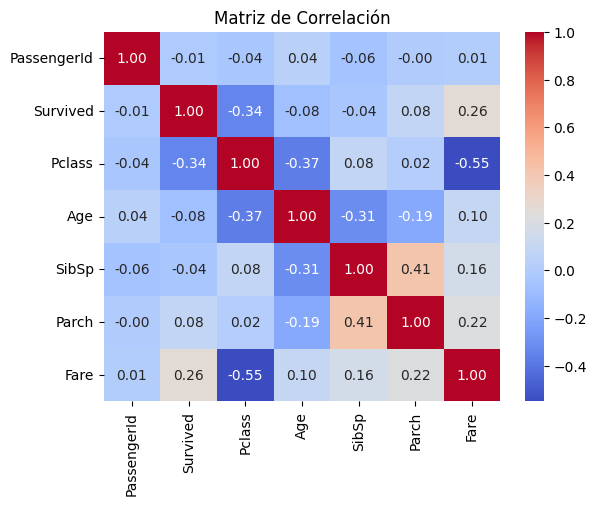

In [ ]:
#Paso 7: Matriz de calor de las columnas numericas
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_columns.corr()

# Visualizar la matriz de correlación con un heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


Sex
male      577
female    314
Name: count, dtype: int64


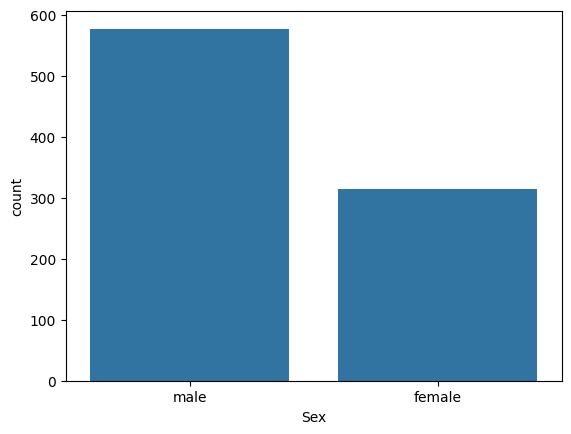

In [ ]:
#PASO 8: GRAFICAR GENERO - FRECUENCIA (GRAFICA DE BARRAS - CATEGORICA CON FRECUENCIA)
import seaborn as sns
import matplotlib.pyplot as plt

# Contar los valores únicos de la columna 'Sex'
print(df['Sex'].value_counts())

# Crear un gráfico de barras para la columna 'Sex'
sns.countplot(x='Sex', data=df)

# Mostrar el gráfico
plt.show()

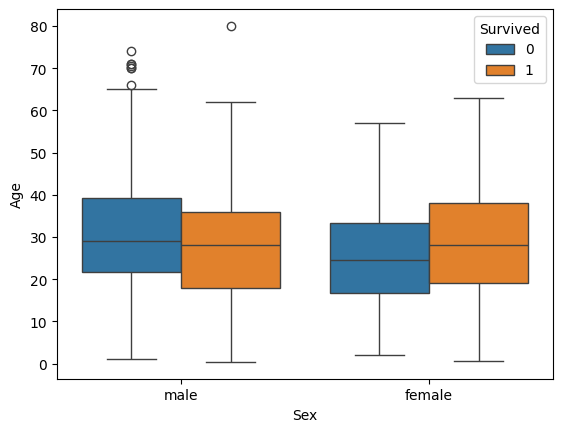

In [ ]:
#PASO 9: GRAFICO DE BARRAS DE SOBREVIVIENTES CON EDAD Y GENERO (COMPARAR CAJA DE PUNTOS TRES VARIABLES: SOBREVIVIO, EDAD Y GENERO)
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un boxplot para la distribución de la edad por género
sns.boxplot(x='Sex', y='Age', data=df, hue="Survived")

# Mostrar el gráfico
plt.show()

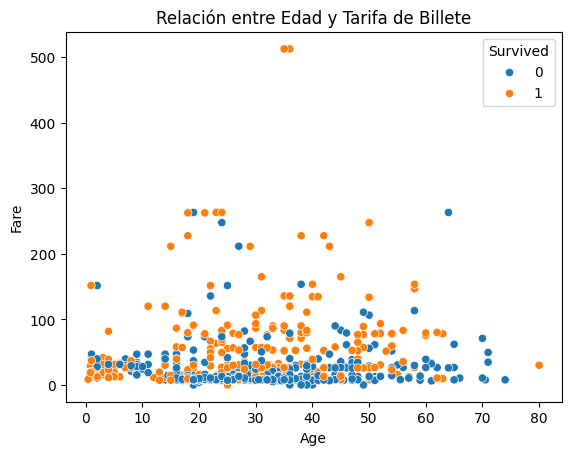

In [ ]:
#PASO 10 : GRAFICO DE PUNTOS CON RELACION A LA EDAD, TARIFA Y SOBREVIVIÓ
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='Age', y='Fare', data=df, hue='Survived')
plt.title('Relación entre Edad y Tarifa de Billete')
plt.show()

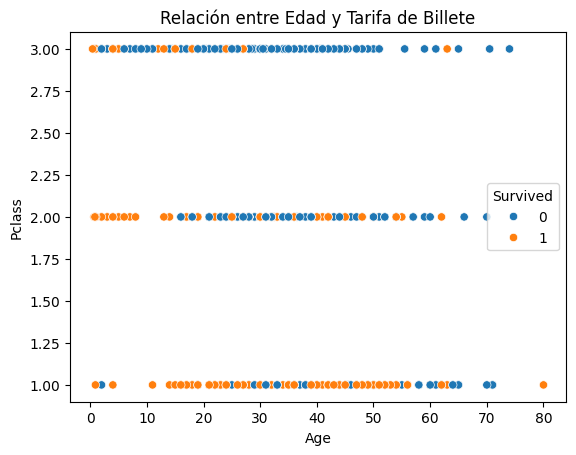

In [ ]:
#PASO 10 : GRAFICO DE PUNTOS CON RELACION A LA EDAD, TARIFA Y SOBREVIVIÓ
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='Age', y='Pclass', data=df, hue='Survived')
plt.title('Relación entre Edad y Tarifa de Billete')
plt.show()

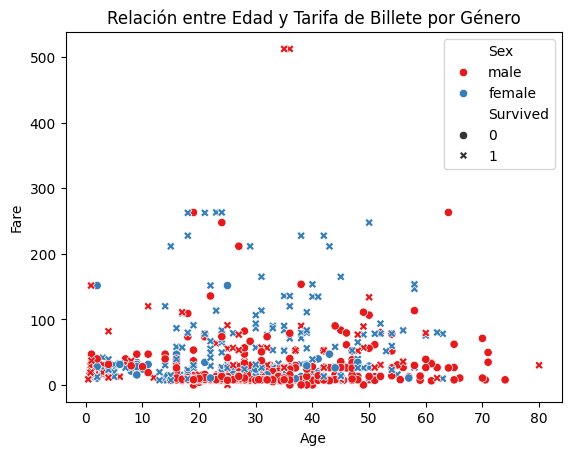

In [ ]:
#PASO 10 : GRAFICO DE PUNTOS CON RELACION A LA EDAD, GENERO, TARIFA Y SOBREVIVIÓ
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión con la relación entre Edad, Tarifa y Género
sns.scatterplot(x='Age', y='Fare', data=df, hue='Sex', style='Survived', palette='Set1')

# Agregar título y mostrar el gráfico
plt.title('Relación entre Edad y Tarifa de Billete por Género')
plt.show()

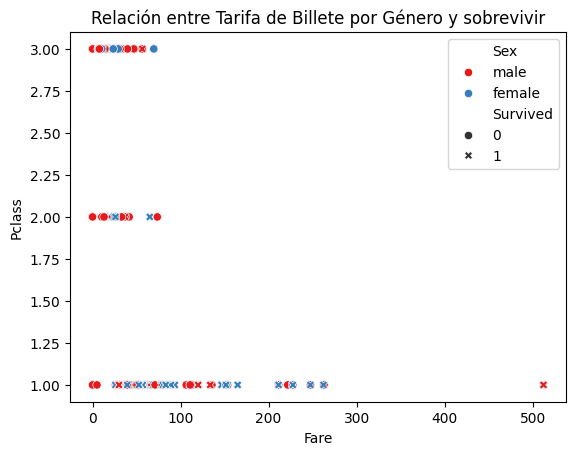

In [ ]:
#PASO 10 : GRAFICO DE PUNTOS CON RELACION A LA GENERO, TARIFA Y SOBREVIVIÓ
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión con la relación entre Edad, Tarifa y Género
sns.scatterplot(x='Fare', y='Pclass', data=df, hue='Sex', style='Survived', palette='Set1')

# Agregar título y mostrar el gráfico
plt.title('Relación entre Tarifa de Billete por Género y sobrevivir')
plt.show()

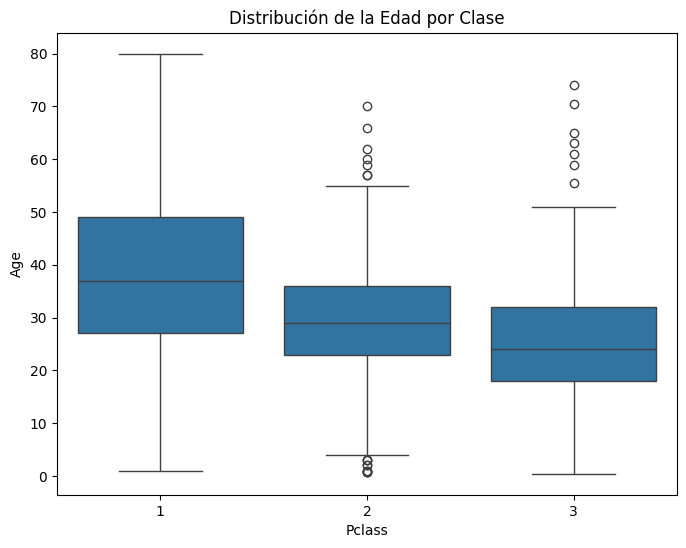

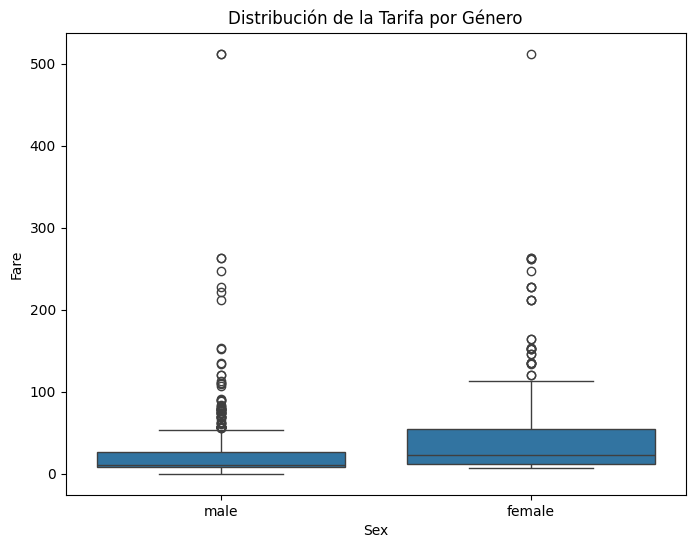

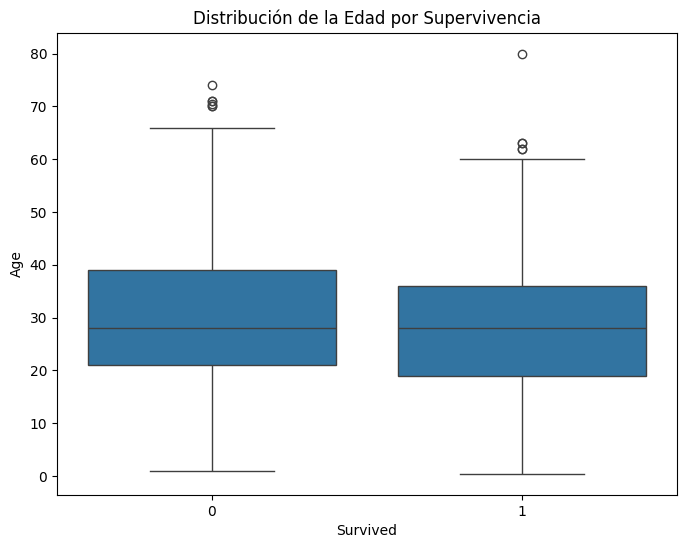

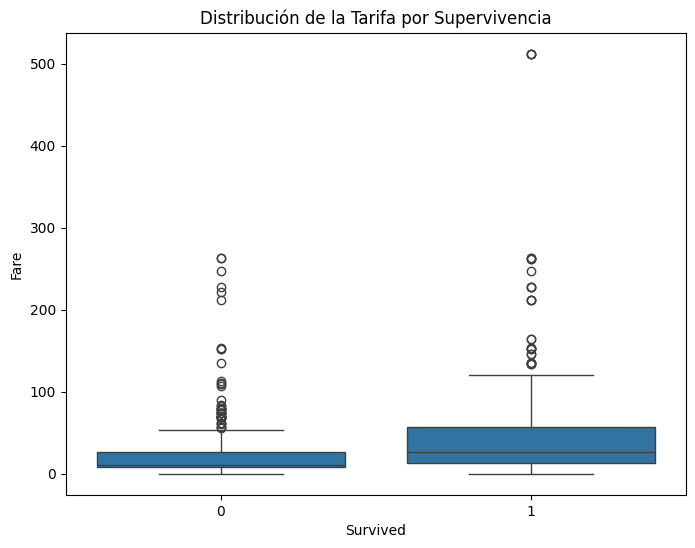

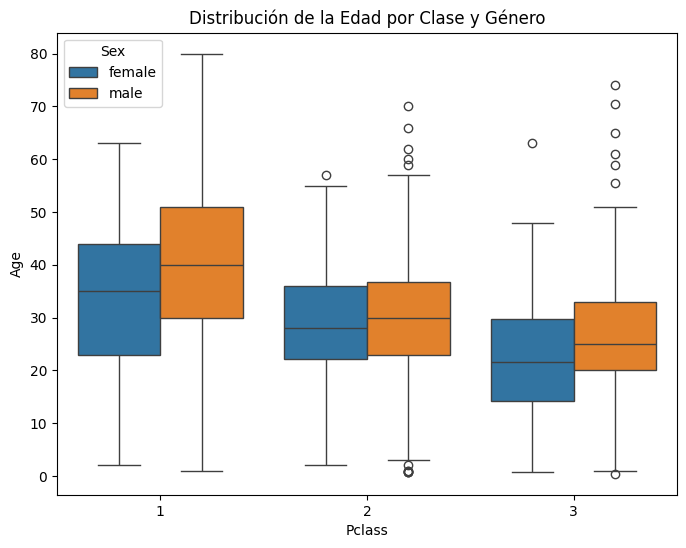

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un boxplot para la distribución de la edad según la clase (Pclass)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Distribución de la Edad por Clase')
plt.show()

# Crear un boxplot para la distribución de la tarifa según el género (Sex)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Fare', data=df)
plt.title('Distribución de la Tarifa por Género')
plt.show()

# Crear un boxplot para la distribución de la edad según si sobrevivieron o no (Survived)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Distribución de la Edad por Supervivencia')
plt.show()

# Crear un boxplot para la distribución de la tarifa según si sobrevivieron o no (Survived)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Distribución de la Tarifa por Supervivencia')
plt.show()

# Crear un boxplot para la distribución de la edad según la clase y género
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=df, hue='Sex')
plt.title('Distribución de la Edad por Clase y Género')
plt.show()

In [ ]:
# Paso 11: Función para detectar outliers usando el IQR
def detectar_outliers(df, columnas):
    for columna in columnas:
        Q1 = df[columna].quantile(0.25)  # Primer cuartil
        Q3 = df[columna].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1  # Rango intercuartílico
        limite_inferior = Q1 - 1.5 * IQR  # Límite inferior
        limite_superior = Q3 + 1.5 * IQR  # Límite superior

        limite_inferior=0

        print(f"Limite inferior para {columna}: {limite_inferior}")
        print(f"Limite superior para {columna}: {limite_superior}")



        outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
        print(f"Outliers en {columna}: {outliers.shape[0]} filas")
        print(outliers[[columna]])

# Detectar outliers para las columnas numéricas
detectar_outliers(df, ['Age', 'Fare'])

Limite inferior para Age: 0
Limite superior para Age: 64.8125
Outliers en Age: 11 filas
      Age
33   66.0
54   65.0
96   71.0
116  70.5
280  65.0
456  65.0
493  71.0
630  80.0
672  70.0
745  70.0
851  74.0
Limite inferior para Fare: 0
Limite superior para Fare: 65.6344
Outliers en Fare: 116 filas
         Fare
1     71.2833
27   263.0000
31   146.5208
34    82.1708
52    76.7292
..        ...
846   69.5500
849   89.1042
856  164.8667
863   69.5500
879   83.1583

[116 rows x 1 columns]


In [ ]:
# Función para eliminar outliers usando el IQR
def eliminar_outliers(df, columnas):
    for columna in columnas:
        Q1 = df[columna].quantile(0.25)  # Primer cuartil
        Q3 = df[columna].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1  # Rango intercuartílico
        limite_inferior = Q1 - 1.5 * IQR  # Límite inferior
        limite_superior = Q3 + 1.5 * IQR  # Límite superior

        # Eliminar los valores fuera de los límites
        df_sin_outliers = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
        print(f"Se eliminaron {df.shape[0] - df_sin_outliers.shape[0]} valores extremos en {columna}")

    print(df_sin_outliers)
    return df_sin_outliers

# Eliminar outliers en las columnas 'Age' y 'Fare'
df_limpio = eliminar_outliers(df, ['Age', 'Fare'])

Se eliminaron 188 valores extremos en Age
Se eliminaron 116 valores extremos en Fare
     PassengerId  Survived  Pclass  \
0              1         0       3   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                         Braund, Mr. Owen Harris    male  22.0      1      0   
2                          Heikkinen, Miss. Laina  female  26.0      0      0   
3    Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                        Allen, Mr. William Henry    male  35.0      0      0   
5                                Moran, Mr. James    

In [ ]:
X=df_limpio[['Pclass','Sex', 'Age', 'Fare', 'Embarked']]
X_test=df_y[['Pclass','Sex', 'Age', 'Fare', 'Embarked']]

y=df_limpio['Survived']


print(X)
print(y)

print(X_test)


     Pclass     Sex   Age     Fare Embarked
0         3    male  22.0   7.2500        S
2         3  female  26.0   7.9250        S
3         1  female  35.0  53.1000        S
4         3    male  35.0   8.0500        S
5         3    male   NaN   8.4583        Q
..      ...     ...   ...      ...      ...
886       2    male  27.0  13.0000        S
887       1  female  19.0  30.0000        S
888       3  female   NaN  23.4500        S
889       1    male  26.0  30.0000        C
890       3    male  32.0   7.7500        Q

[775 rows x 5 columns]
0      0
2      1
3      1
4      0
5      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 775, dtype: int64
     Pclass     Sex   Age      Fare Embarked
0         3    male  34.5    7.8292        Q
1         3  female  47.0    7.0000        S
2         2    male  62.0    9.6875        Q
3         3    male  27.0    8.6625        S
4         3  female  22.0   12.2875        S
..      ...     ...   ...       ...  

In [ ]:
print(X.isnull().sum())

promedio=int(X['Age'].mean())
print(promedio)

X['Age']=X['Age'].fillna(promedio)
print(X)
print(X.isnull().sum())

Pclass        0
Sex           0
Age         162
Fare          0
Embarked      0
dtype: int64
28
     Pclass     Sex   Age     Fare Embarked
0         3    male  22.0   7.2500        S
2         3  female  26.0   7.9250        S
3         1  female  35.0  53.1000        S
4         3    male  35.0   8.0500        S
5         3    male  28.0   8.4583        Q
..      ...     ...   ...      ...      ...
886       2    male  27.0  13.0000        S
887       1  female  19.0  30.0000        S
888       3  female  28.0  23.4500        S
889       1    male  26.0  30.0000        C
890       3    male  32.0   7.7500        Q

[775 rows x 5 columns]
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64


<ipython-input-259-7bb7aa748675>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age']=X['Age'].fillna(promedio)


In [ ]:
#Paso 12: Transformacion de texto a numeros
from sklearn.preprocessing import LabelEncoder

# Codificación de 'Sex' (masculino=0, femenino=1)
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])
X_test['Sex'] = label_encoder.fit_transform(X_test['Sex'])


# Codificación One-Hot de 'Embarked' (C, S)
X = pd.get_dummies(X, columns=['Embarked'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Embarked'], drop_first=True)

print(X)


     Pclass  Sex   Age     Fare  Embarked_Q  Embarked_S
0         3    1  22.0   7.2500       False        True
2         3    0  26.0   7.9250       False        True
3         1    0  35.0  53.1000       False        True
4         3    1  35.0   8.0500       False        True
5         3    1  28.0   8.4583        True       False
..      ...  ...   ...      ...         ...         ...
886       2    1  27.0  13.0000       False        True
887       1    0  19.0  30.0000       False        True
888       3    0  28.0  23.4500       False        True
889       1    1  26.0  30.0000       False       False
890       3    1  32.0   7.7500        True       False

[775 rows x 6 columns]


<ipython-input-260-8c771551bf01>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = label_encoder.fit_transform(X['Sex'])
<ipython-input-260-8c771551bf01>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Sex'] = label_encoder.fit_transform(X_test['Sex'])


In [ ]:
print(X)
print(y)

     Pclass  Sex   Age     Fare  Embarked_Q  Embarked_S
0         3    1  22.0   7.2500       False        True
2         3    0  26.0   7.9250       False        True
3         1    0  35.0  53.1000       False        True
4         3    1  35.0   8.0500       False        True
5         3    1  28.0   8.4583        True       False
..      ...  ...   ...      ...         ...         ...
886       2    1  27.0  13.0000       False        True
887       1    0  19.0  30.0000       False        True
888       3    0  28.0  23.4500       False        True
889       1    1  26.0  30.0000       False       False
890       3    1  32.0   7.7500        True       False

[775 rows x 6 columns]
0      0
2      1
3      1
4      0
5      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 775, dtype: int64


In [ ]:
#Paso 13: Uso de modelos - entrenamiento
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Entrenar el modelo
model.fit(X, y)
# Hacer predicciones sobre los datos de prueba
y_pred = model.predict(X_test)
print(type(y_pred))

#Evaluar la precisión
from sklearn.metrics import accuracy_score
#Conversion
y_pred_df = pd.DataFrame({'Survived': y_pred})
print(y_pred_df)
y_test_df = pd.DataFrame({'Survived': y_test['Survived']})
print(y_test_df)
accuracy = accuracy_score(y_test_df, y_pred_df)
print(f"Precisión del modelo Random Forest Classifier: {accuracy * 100:.2f}%")


<class 'numpy.ndarray'>
     Survived
0           0
1           0
2           0
3           1
4           1
..        ...
413         0
414         1
415         0
416         0
417         0

[418 rows x 1 columns]
     Survived
0           0
1           1
2           0
3           0
4           1
..        ...
413         0
414         1
415         0
416         0
417         0

[418 rows x 1 columns]
Precisión del modelo Random Forest Classifier: 81.34%


In [ ]:
"""from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

promedio=int(X_test['Age'].mean())
X_test['Age']=X_test['Age'].fillna(promedio)
print(X_test.isnull().sum())

promedioFare=int(X_test['Fare'].mean())
X_test['Fare']=X_test['Fare'].fillna(promedioFare)
print(X_test.isnull().sum())

y_pred = model.predict(X_test)
print(y_pred)
print(type(y_pred))
"""

"from sklearn.linear_model import LinearRegression\nmodel = LinearRegression()\nmodel.fit(X, y)\n\npromedio=int(X_test['Age'].mean())\nX_test['Age']=X_test['Age'].fillna(promedio)\nprint(X_test.isnull().sum())\n\npromedioFare=int(X_test['Fare'].mean())\nX_test['Fare']=X_test['Fare'].fillna(promedioFare)\nprint(X_test.isnull().sum())\n\ny_pred = model.predict(X_test)\nprint(y_pred)\nprint(type(y_pred)) \n"

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, y)

promedio=int(X_test['Age'].mean())
X_test['Age']=X_test['Age'].fillna(promedio)
print(X_test.isnull().sum())

promedioFare=int(X_test['Fare'].mean())
X_test['Fare']=X_test['Fare'].fillna(promedioFare)
print(X_test.isnull().sum())

y_pred = model.predict(X_test)
print(y_pred)
print(type(y_pred))

#Evaluar la precisión
from sklearn.metrics import accuracy_score
#Conversion
y_pred_df = pd.DataFrame({'Survived': y_pred})
print(y_pred_df)
y_test_df = pd.DataFrame({'Survived': y_test['Survived']})
print(y_test_df)
accuracy = accuracy_score(y_test_df, y_pred_df)
print(f"Precisión del modelo Decision Tree Classifier: {accuracy * 100:.2f}%")


Pclass        0
Sex           0
Age           0
Fare          1
Embarked_Q    0
Embarked_S    0
dtype: int64
Pclass        0
Sex           0
Age           0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64
[0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0
 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1

In [ ]:
y_test=pd.read_csv('gender_submission.csv')
print(y_test)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [ ]:
#Evaluar la precisión
from sklearn.metrics import accuracy_score
#Conversion
y_pred_df = pd.DataFrame({'Survived': y_pred})
print(y_pred_df)
y_test_df = pd.DataFrame({'Survived': y_test['Survived']})
print(y_test_df)
accuracy = accuracy_score(y_test_df, y_pred_df)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

     Survived
0           0
1           0
2           1
3           1
4           1
..        ...
413         0
414         1
415         0
416         0
417         0

[418 rows x 1 columns]
     Survived
0           0
1           1
2           0
3           0
4           1
..        ...
413         0
414         1
415         0
416         0
417         0

[418 rows x 1 columns]
Precisión del modelo: 77.03%


In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X, y)

promedio=int(X_test['Age'].mean())
X_test['Age']=X_test['Age'].fillna(promedio)
print(X_test.isnull().sum())

promedioFare=int(X_test['Fare'].mean())
X_test['Fare']=X_test['Fare'].fillna(promedioFare)
print(X_test.isnull().sum())

y_pred = model.predict(X_test)
print(y_pred)
print(type(y_pred))

#Evaluar la precisión
from sklearn.metrics import accuracy_score
#Conversion
y_pred_df = pd.DataFrame({'Survived': y_pred})
print(y_pred_df)
y_test_df = pd.DataFrame({'Survived': y_test['Survived']})
print(y_test_df)
accuracy = accuracy_score(y_test_df, y_pred_df)
print(f"Precisión del modelo Decision Tree Classifier: {accuracy * 100:.2f}%")


Pclass        0
Sex           0
Age           0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64
Pclass        0
Sex           0
Age           0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Preprocesamiento (asegúrate de definir tus X e y correctamente)
promedio_age = int(X_test['Age'].mean())
X_test['Age'] = X_test['Age'].fillna(promedio_age)
promedio_fare = int(X_test['Fare'].mean())
X_test['Fare'] = X_test['Fare'].fillna(promedio_fare)

# Dividir datos para entrenamiento y prueba
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de modelos a evaluar
models = {
    'SVC (Linear Kernel)': SVC(kernel='linear', probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Evaluación de modelos
for model_name, model in models.items():
    print(f"Evaluando modelo: {model_name}")

    # Entrenamiento
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_val)
    print("y_pred = ",y_pred)
    print("valor de modelos sin ajuste de np", model.predict_proba(X_val))
    y_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None
    print("y_proba = ",y_proba)
    # Métricas
    print("Métricas de clasificación:")
    print(classification_report(y_val, y_pred))

    # Matriz de confusión
    print("Matriz de Confusión:")
    print(confusion_matrix(y_val, y_pred))

    # Métrica F1 y otras
    f1 = classification_report(y_val, y_pred, output_dict=True)['weighted avg']['f1-score']
    accuracy = accuracy_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_proba) if y_proba is not None else "No disponible"

    print(f"F1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc if y_proba is not None else 'No disponible'}")
    print("\n---\n")


Evaluando modelo: SVC (Linear Kernel)
y_pred =  [0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1
 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1
 0 0 0 0 1 0 1]
valor de modelos sin ajuste de np [[0.83120012 0.16879988]
 [0.83119917 0.16880083]
 [0.31614529 0.68385471]
 [0.83127203 0.16872797]
 [0.83108479 0.16891521]
 [0.83112677 0.16887323]
 [0.83091356 0.16908644]
 [0.31661756 0.68338244]
 [0.31655574 0.68344426]
 [0.83093132 0.16906868]
 [0.31606477 0.68393523]
 [0.31693795 0.68306205]
 [0.83080571 0.16919429]
 [0.83121147 0.16878853]
 [0.83122313 0.16877687]
 [0.83117539 0.16882461]
 [0.8314416  0.1685584 ]
 [0.83124497 0.16875503]
 [0.31669857 0.68330143]
 [0.83117527 0.16882473]
 [0.83121147 0.16878853]
 [0.83091    0.16909   ]
 [0.8311149  0.1688851 ]
 [0.8309436  0.1690564 ]
 [

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Asegúrate de definir X e y con tus datos antes de ejecutar este código.
# Ejemplo:
# X = datos[características]
# y = datos['Survived']

# Dividir los datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de modelos a evaluar
models = {
    'SVC (Linear Kernel)': SVC(kernel='linear', probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'Naive Bayes': GaussianNB()
}

# Evaluación de modelos
for model_name, model in models.items():
    print(f"=== Evaluando modelo: {model_name} ===")

    # Entrenamiento
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None

    # Métricas
    print("\nMétricas de Clasificación:")
    print(classification_report(y_val, y_pred))

    # Matriz de confusión
    print("\nMatriz de Confusión:")
    print(confusion_matrix(y_val, y_pred))

    # F1-Score y otras métricas
    f1 = classification_report(y_val, y_pred, output_dict=True)['weighted avg']['f1-score']
    accuracy = accuracy_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_proba) if y_proba is not None else "No disponible"

    print(f"\nF1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc if y_proba is not None else 'No disponible'}")
    print("\n---\n")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


=== Evaluando modelo: SVC (Linear Kernel) ===

Métricas de Clasificación:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        95
           1       0.70      0.62      0.65        60

    accuracy                           0.75       155
   macro avg       0.74      0.72      0.73       155
weighted avg       0.74      0.75      0.75       155


Matriz de Confusión:
[[79 16]
 [23 37]]

F1-Score: 0.7451
Accuracy: 0.7484
ROC AUC: 0.786140350877193

---

=== Evaluando modelo: Decision Tree ===

Métricas de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        95
           1       0.68      0.67      0.67        60

    accuracy                           0.75       155
   macro avg       0.73      0.73      0.73       155
weighted avg       0.75      0.75      0.75       155


Matriz de Confusión:
[[76 19]
 [20 40]]

F1-Score: 0.7480
Accuracy: 0.7484
ROC AUC: 0.74096491

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:45:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Métricas de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        95
           1       0.76      0.65      0.70        60

    accuracy                           0.79       155
   macro avg       0.78      0.76      0.77       155
weighted avg       0.79      0.79      0.78       155


Matriz de Confusión:
[[83 12]
 [21 39]]

F1-Score: 0.7833
Accuracy: 0.7871
ROC AUC: 0.836578947368421

---

=== Evaluando modelo: LightGBM ===
[LightGBM] [Info] Number of positive: 203, number of negative: 417
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 164
[LightGBM] [Info] Number of data points in the train set: 620, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.327419 -> initscore=-0.719880
[Ligh